<div class='alert alert-success'>

<h1 style='text-align:center'>Predicting Insurance Premiums</h1>

<b>Dataset contains a few attributes for each person such as Age, Sex, BMI, Children, Smoker, Region and their Charges</b>

<h2>Objective</h2>
<b>To use this info to predict charges for new customers</b>

<h2>Method</h2>
<ol>
    <li><b>Data Acquisition</b></li>
    <li><b>Data Inspection and Exploratory Analysis</b></li>
    <li><b>Data Inspection and Exploratory Analysis</b></li>
    <li><b>Preprocessing data for modelling</b></li>
    <li><b>Regression Modelling and Evaluation</b></li>
    <li><b>Test best model on new data</b></li>
</ol>
    
</div>

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 1. Data Acquisition 

In [432]:
# read data

data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [349]:
def inspect_data(data):
    print('Rows     : ', data.shape[0])
    print('Columns  : ', data.shape[1])
    print()
    print('Features : ')
    print(data.columns.str.lower().tolist())
    print()
    print('Missing Values: ', data.isnull().sum().values.sum())
    print()
    print('Unique Values :')
    print(data.nunique())
    print()
    print('Data Info')
    print(data.info())

## 2. Data Inspection and Exploratory Analysis

In [350]:
# data inspection

inspect_data(data)

Rows     :  1338
Columns  :  7

Features : 
['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Missing Values:  0

Unique Values :
age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


### Exploratory Data Analysis

In [351]:
def get_dtypes(data):
    num_cols = data.select_dtypes(include=np.number).columns
    cat_cols = data.select_dtypes(include=[object]).columns
    return num_cols, cat_cols

In [352]:
num_cols, cat_cols = get_dtypes(data)
print('Numeric: ', num_cols)
print('Categorical: ', cat_cols)

Numeric:  Index(['age', 'bmi', 'children', 'charges'], dtype='object')
Categorical:  Index(['sex', 'smoker', 'region'], dtype='object')


### Categorical EDA

#### Sex

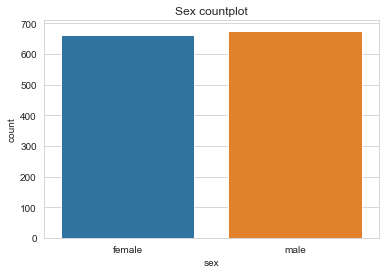

In [353]:
sns.set_style('whitegrid')
sns.countplot(data.sex)
plt.title('Sex countplot')
plt.show()

> **count of male almost same as female**

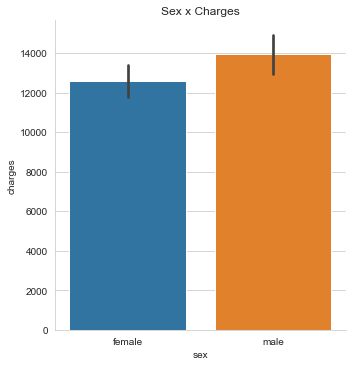

In [354]:
sns.catplot(x='sex', y='charges', kind='bar', data=data)
plt.title('Sex x Charges')
plt.show()

> **males pay slightly more charges than females**

#### smoke

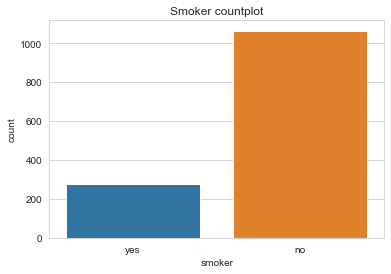

In [355]:
sns.set_style('whitegrid')
sns.countplot(data.smoker)
plt.title('Smoker countplot')
plt.show()

> **more smokers than non smokers**

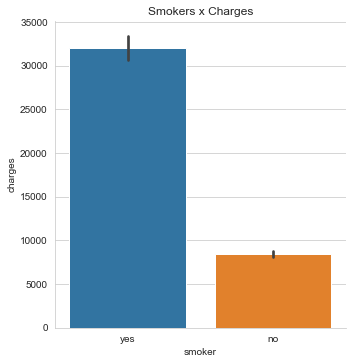

In [356]:
sns.catplot(x='smoker', y='charges', kind='bar', data=data)
plt.title('Smokers x Charges')
plt.show()

> **smokers pay way more charges than non smokers**

#### region

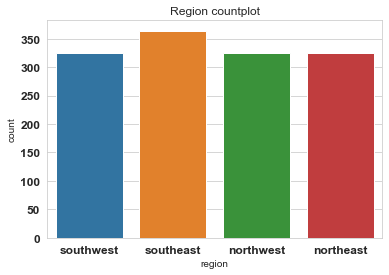

In [357]:
sns.set_style('whitegrid')
sns.countplot(data.region)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.title('Region countplot')
plt.show()

> **Southeat region is highest, with the rest same**

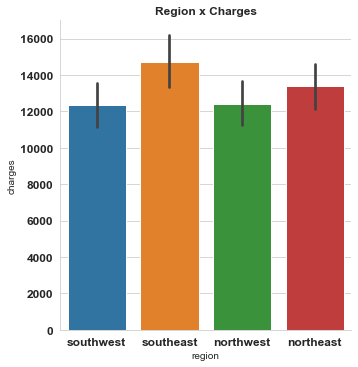

In [358]:
sns.catplot(x='region', y='charges', kind='bar', data=data)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.title('Region x Charges', fontsize=12, weight='bold')
plt.show()

> **southeast region pay more than the others. with northeast next, nothwest in tow and southwest last**

### Numerical EDA

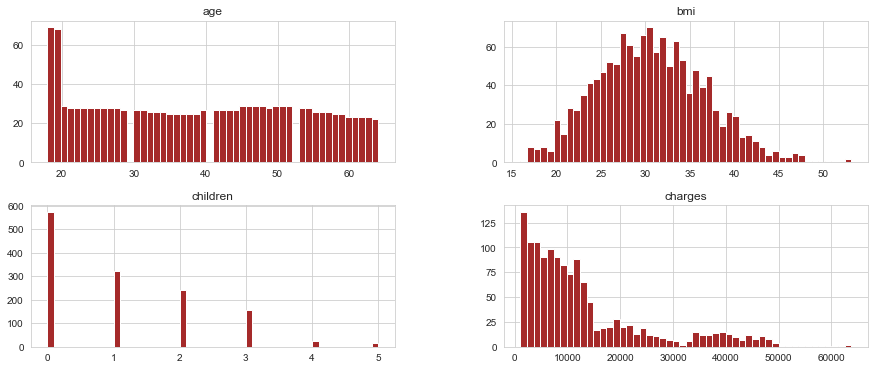

In [359]:
data.hist(figsize=(15,6), color='brown', bins=50)
plt.show()

> **Age:
    - Uniformly distributed 
    - Peaks below 20**
    
> **BMI:
    - Normaly distribured
    - Peaksat 30**
    
> **Children:
    - Peaks descends from 0 - 5**
    
> **Charges:
    - Right skewed, payment is high from 0-1000**

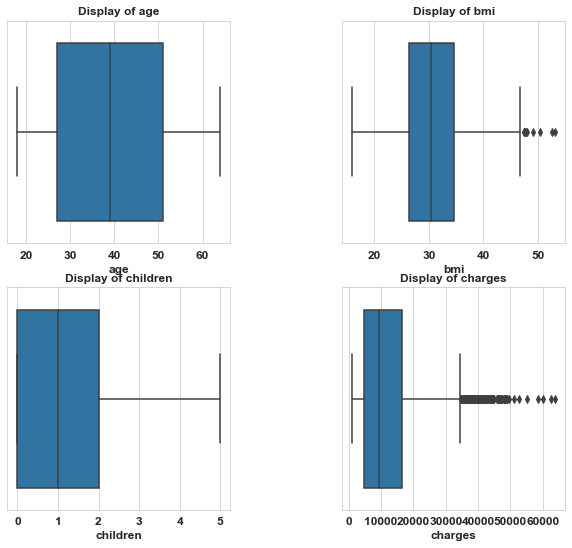

In [360]:
plt.figure(1, figsize=(10,9))
n=0
for x in num_cols:
    n += 1
    plt.subplot(2, 2, n)
    plt.subplots_adjust(wspace=.5)
    sns.boxplot(data[x])
    plt.title('Display of {}'.format(x), fontsize=12, weight='bold')
    plt.xticks(fontsize=12, weight='bold')
    plt.xlabel('{}'.format(x), fontsize=12, weight='bold')
plt.show()

> **bmi and charges appear to be skewed**

### Bivariate analysis

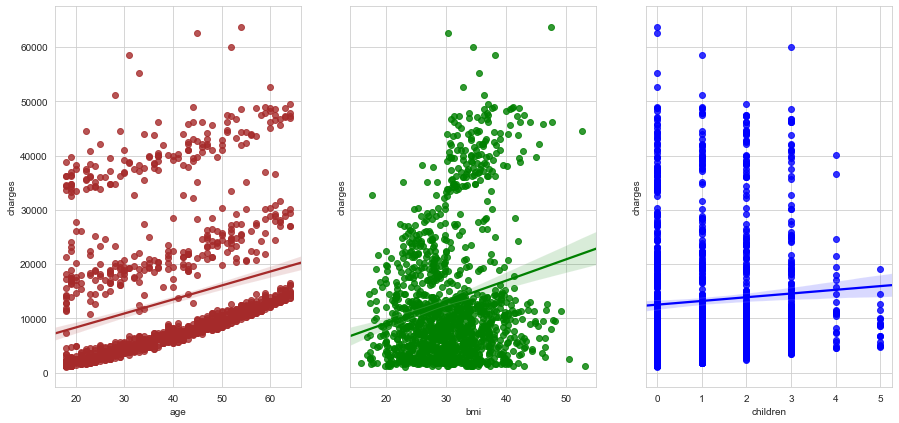

In [361]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 7), sharey=True)
sns.regplot(data=data, x='age', y='charges', ax=axes[0], color='brown')
sns.regplot(data=data, x='bmi', y='charges', ax=axes[1], color='green')
sns.regplot(data=data, x='children', y='charges', ax=axes[2], color='blue')
plt.show()

> **There appear to be a linear relationship between Age, Bmi  and Children and charges as when they increase, charges increases**

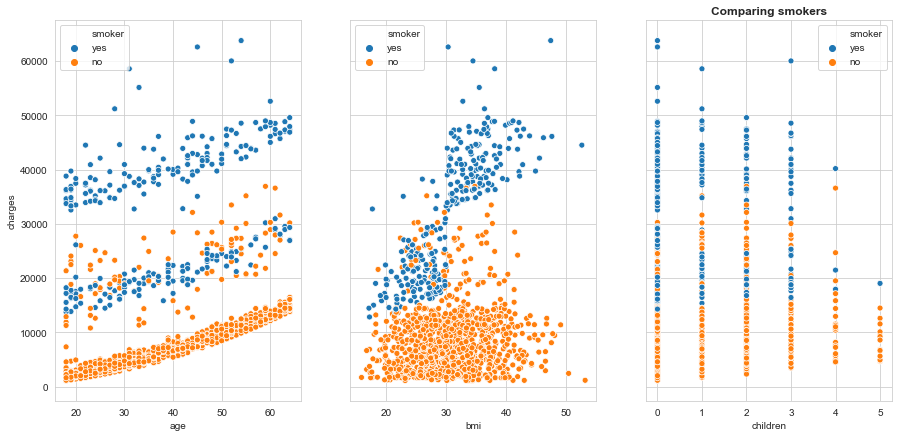

In [362]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 7), sharey=True)
sns.scatterplot(data=data, x='age', y='charges', hue='smoker', ax=axes[0], color='brown')
sns.scatterplot(data=data, x='bmi', y='charges', hue='smoker', ax=axes[1], color='green')
sns.scatterplot(data=data, x='children', y='charges', hue='smoker', ax=axes[2], color='blue')
plt.title('Comparing smokers', fontsize=12, weight='bold')
plt.show()

>**from the plot, smokers pay more charges than non smokers**

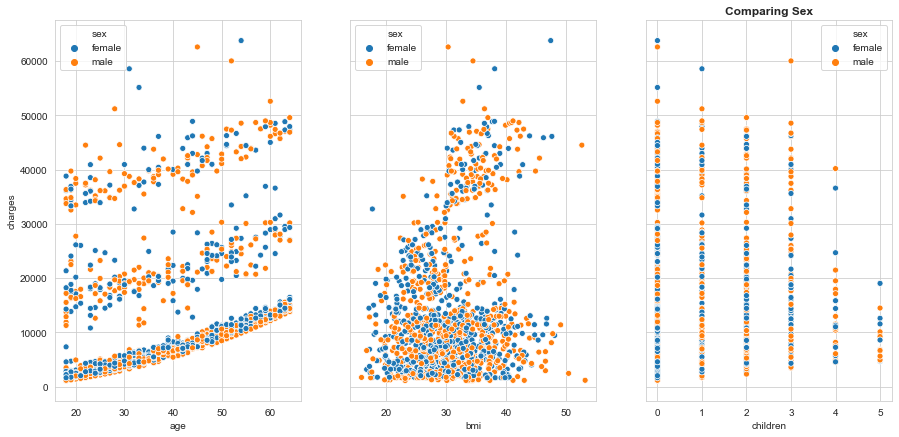

In [363]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 7), sharey=True)
sns.scatterplot(data=data, x='age', y='charges', hue='sex', ax=axes[0], color='brown')
sns.scatterplot(data=data, x='bmi', y='charges', hue='sex', ax=axes[1], color='green')
sns.scatterplot(data=data, x='children', y='charges', hue='sex', ax=axes[2], color='blue')
plt.title('Comparing Sex', fontsize=12,weight='bold')
plt.show()

> **Difficult to tell difference since  distribution of male and female charges are almost equal**

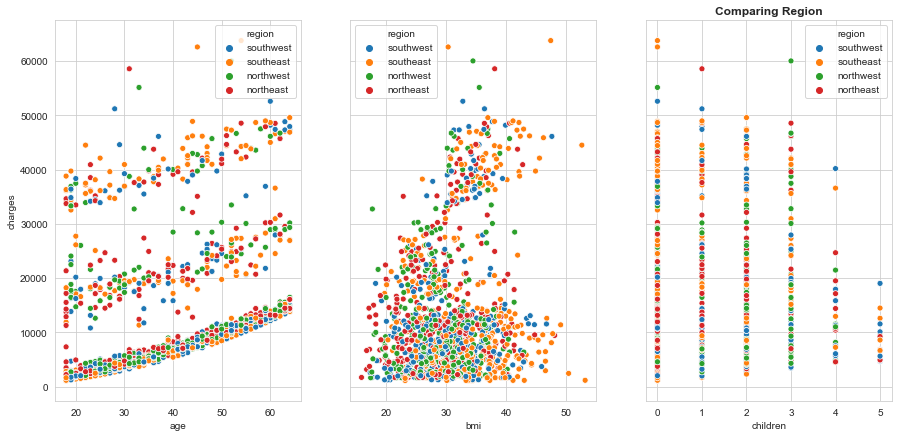

In [364]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 7), sharey=True)
sns.scatterplot(data=data, x='age', y='charges', hue='region', ax=axes[0], color='brown')
sns.scatterplot(data=data, x='bmi', y='charges', hue='region', ax=axes[1], color='green')
sns.scatterplot(data=data, x='children', y='charges', hue='region', ax=axes[2], color='blue')
plt.title('Comparing Region', fontsize=12,weight='bold')
plt.show()

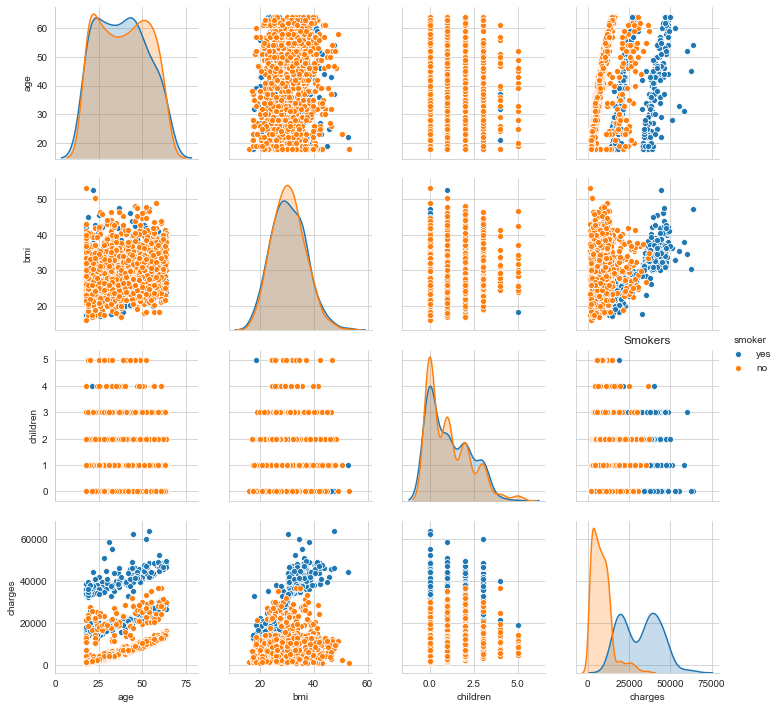

In [365]:
sns.pairplot(data, hue='smoker')
plt.title('Smokers')
plt.show()

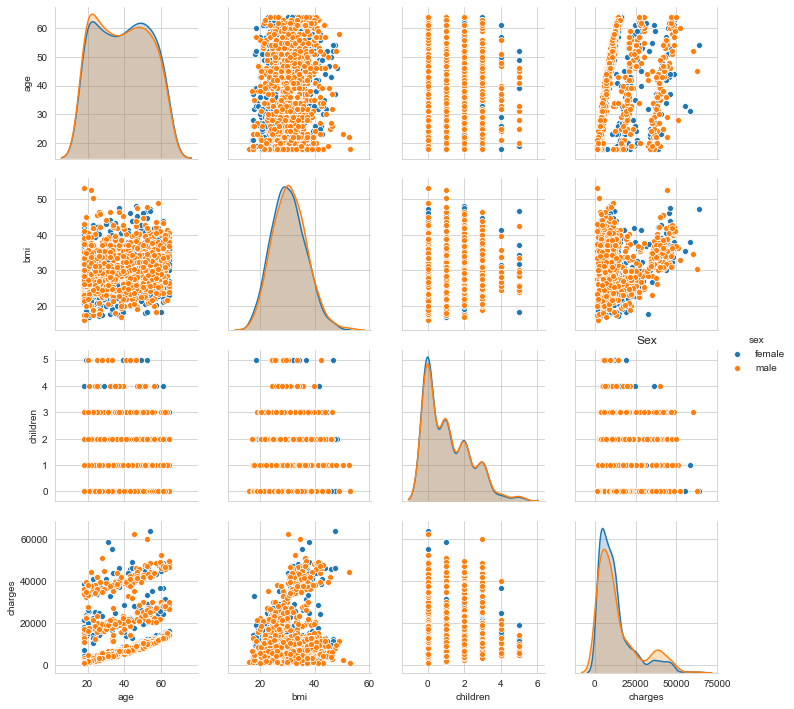

In [366]:
sns.pairplot(data, hue='sex')
plt.title('Sex')
plt.show()

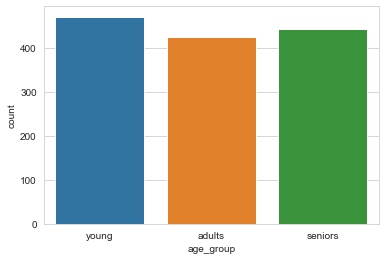

In [433]:
level = ['young', 'adults', 'seniors']
age_groups = pd.qcut(data.age, q=3, labels=level)
data['age_group'] = age_groups
sns.countplot(data.age_group)
plt.show()

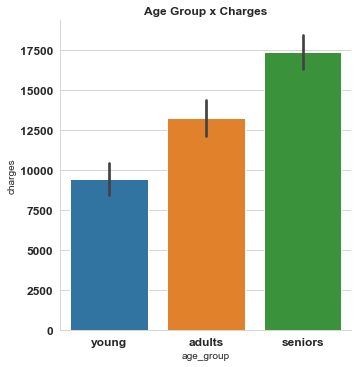

In [368]:
sns.catplot(x='age_group', y='charges', kind='bar', data=data)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(fontsize=12, weight='bold')
plt.title('Age Group x Charges', fontsize=12, weight='bold')
plt.show()

> **from the plot, seniors pay charges than adults, and adults than young**

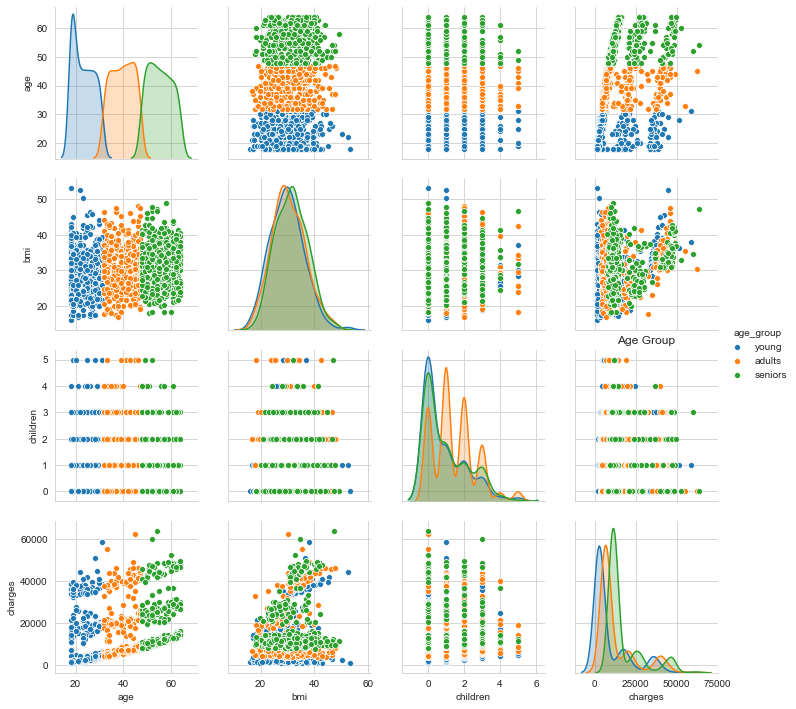

In [369]:
sns.pairplot(data, hue='age_group')
plt.title('Age Group')
plt.show()

## 3. Preprocessing data for modelling

In [370]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


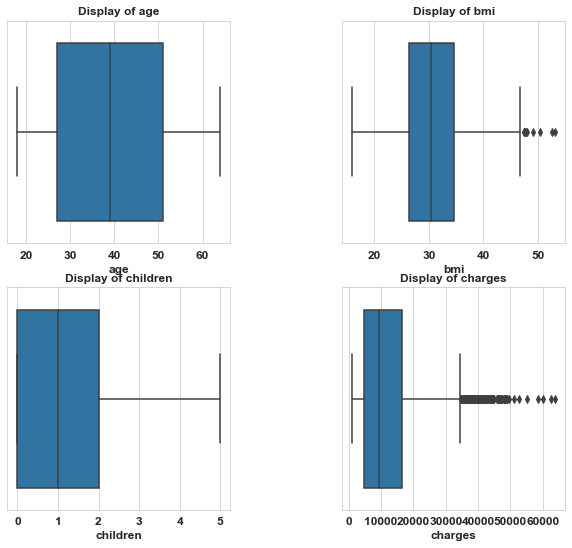

In [371]:
plt.figure(1, figsize=(10,9))
n=0
for x in num_cols:
    n += 1
    plt.subplot(2, 2, n)
    plt.subplots_adjust(wspace=.5)
    sns.boxplot(data[x])
    plt.title('Display of {}'.format(x), fontsize=12, weight='bold')
    plt.xticks(fontsize=12, weight='bold')
    plt.xlabel('{}'.format(x), fontsize=12, weight='bold')
plt.show()

### capping charges and bmi

In [372]:
from feature_engine.outliers import Winsorizer

In [434]:
data2 = data.copy()

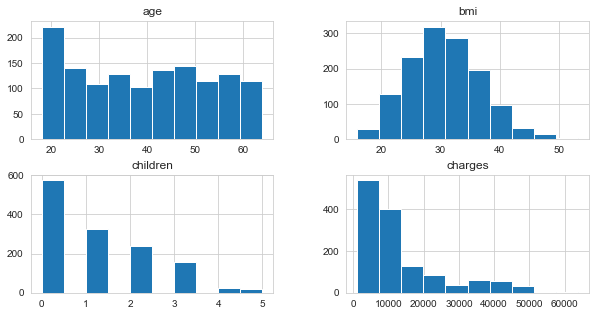

In [374]:
data2.hist(figsize=(10, 5))
plt.show()

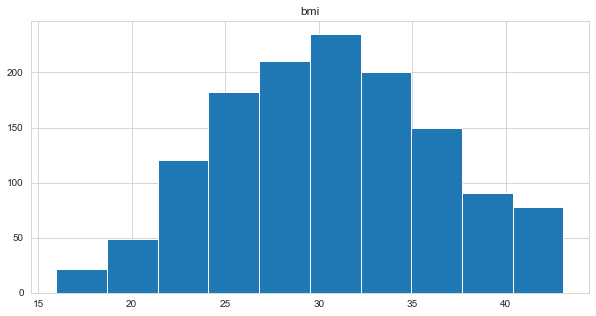

In [425]:
capper = Winsorizer(capping_method='iqr', tail='right', fold=1)
data2 = capper.fit_transform(data[['bmi']])
data2.hist(figsize=(10, 5))
plt.show()

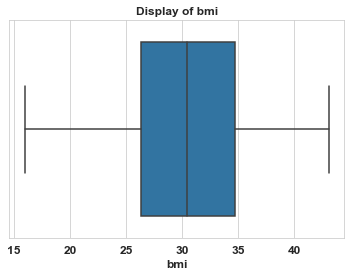

In [377]:
sns.boxplot(data2.bmi)
plt.title('Display of bmi', fontsize=12, weight='bold')
plt.xticks(fontsize=12, weight='bold')
plt.xlabel('bmi', fontsize=12, weight='bold')
plt.show()

In [378]:
data2.head()

,bmi
0,27.900
1,33.770
2,33.000
3,22.705
4,28.880


In [435]:
data.bmi = data2.bmi

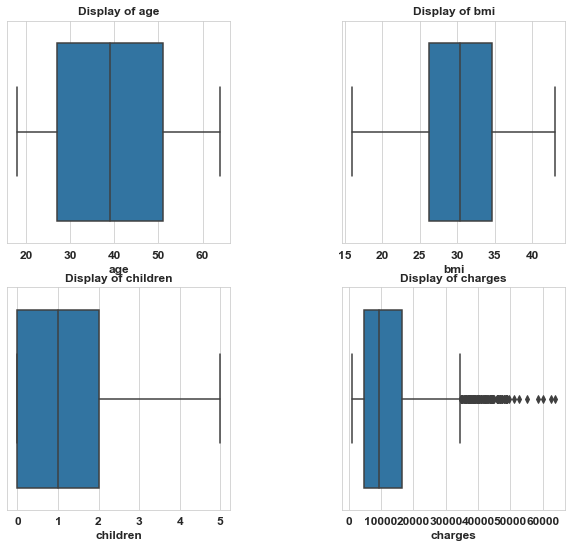

In [380]:
plt.figure(1, figsize=(10,9))
n=0
for x in num_cols:
    n += 1
    plt.subplot(2, 2, n)
    plt.subplots_adjust(wspace=.5)
    sns.boxplot(data[x])
    plt.title('Display of {}'.format(x), fontsize=12, weight='bold')
    plt.xticks(fontsize=12, weight='bold')
    plt.xlabel('{}'.format(x), fontsize=12, weight='bold')
plt.show()

In [381]:
data.head()

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,young
1,18,male,33.770,1,no,southeast,1725.55230,young
2,28,male,33.000,3,no,southeast,4449.46200,young
3,33,male,22.705,0,no,northwest,21984.47061,adults
4,32,male,28.880,0,no,northwest,3866.85520,adults


### encoding categorical variables

In [436]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [437]:
data.sex = data.sex.map(lambda s: 1 if s=='female' else 0)
data.smoker = data.smoker.map(lambda sm: 1 if sm=='yes' else 0)
data.age_group = data.age_group.map(lambda agrp: 2 if agrp=='seniors' else 1 if agrp=='adults' else 0)
data.region = data.region.map(lambda r: 2 if r=='southeast' else 1 if r=='northeast' else 0)

In [438]:
data.head()

,age,sex,bmi,children,smoker,region,charges,age_group
0,19,1,27.900,0,1,0,16884.92400,0
1,18,0,33.770,1,0,2,1725.55230,0
2,28,0,33.000,3,0,2,4449.46200,0
3,33,0,22.705,0,0,0,21984.47061,1
4,32,0,28.880,0,0,0,3866.85520,1


In [439]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        1338 non-null   int64   
 1   sex        1338 non-null   int64   
 2   bmi        1338 non-null   float64 
 3   children   1338 non-null   int64   
 4   smoker     1338 non-null   int64   
 5   region     1338 non-null   int64   
 6   charges    1338 non-null   float64 
 7   age_group  1338 non-null   category
dtypes: category(1), float64(2), int64(5)
memory usage: 74.7 KB


In [440]:
data.age_group = data.age_group.astype(int)

In [441]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   region     1338 non-null   int64  
 6   charges    1338 non-null   float64
 7   age_group  1338 non-null   int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 78.5 KB


In [442]:
data.corr().style.background_gradient(cmap='BuPu')

,age,sex,bmi,children,smoker,region,charges,age_group
age,1.000000,0.020856,0.109272,0.042469,-0.025019,-0.011022,0.299008,0.944794
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.016821,-0.057292,0.020543
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.214654,0.198341,0.114874
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.035905,0.067998,0.040372
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.073670,0.787251,-0.038266
region,-0.011022,-0.016821,0.214654,-0.035905,0.073670,1.000000,0.081249,-0.009866
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.081249,1.000000,0.269855
age_group,0.944794,0.020543,0.114874,0.040372,-0.038266,-0.009866,0.269855,1.000000


In [443]:
## drop age group since its multicorrelates with age
data.drop(['age_group'], axis=1, inplace=True)

### X/y split

In [444]:
X = data.drop(['charges'], axis=1)
y = data.charges

In [445]:
X.shape

(1338, 6)

In [446]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,0
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,0
4,32,0,28.880,0,0,0


### Train/Test split

In [447]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=44)

### scaling

In [448]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [449]:
ind_trian = X_train.index
ind_test = X_test.index
col_train = X_train.columns
col_test = X_test.columns

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [450]:
X_train = pd.DataFrame(X_train, index=ind_trian, columns=col_train)
X_test = pd.DataFrame(X_test, index=ind_test, columns=col_test)

In [451]:
X_train.head()

,age,sex,bmi,children,smoker,region
284,0.926997,0.991489,0.088360,-0.919138,-0.516310,-0.948109
1267,-1.073393,-1.008584,0.065736,-0.919138,1.936819,0.241476
259,-1.430606,-1.008584,0.209018,-0.919138,1.936819,-0.948109
838,-0.287526,0.991489,-1.207882,0.772727,-0.516310,0.241476
758,-0.644738,-1.008584,1.132392,1.618659,-0.516310,0.241476


In [452]:
X_test.head()

,age,sex,bmi,children,smoker,region
440,-0.573296,0.991489,0.336380,-0.073206,-0.516310,-0.948109
1202,-1.216278,-1.008584,0.240859,-0.919138,-0.516310,-0.948109
820,0.426900,-1.008584,0.507313,-0.073206,-0.516310,-0.948109
730,-0.287526,-1.008584,-1.047842,1.618659,1.936819,1.431060
78,-1.216278,0.991489,1.530397,-0.919138,-0.516310,0.241476


In [453]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test, y_test))

0.7697050325881523


In [454]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results

,Actual,Predicted
440,4738.26820,7300.932458
1202,2055.32490,3936.133788
820,7445.91800,10809.068343
730,19361.99880,30001.828997
78,2755.02095,6984.705320
...,...,...
74,7726.85400,8844.098474
1121,8347.16430,13034.694089
1203,9964.06000,11835.937078
1,1725.55230,3917.932382


## 4. Regression Modelling and Evaluation

In [455]:
from sklearn.linear_model import LinearRegression  # Import Linear Regression model

multiple_linear_reg = LinearRegression(fit_intercept=False)  # Create a instance for Linear Regression model
multiple_linear_reg.fit(X_train, y_train)  # Fit data to the model

LinearRegression(fit_intercept=False)

In [456]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=3)  # Create a PolynomialFeatures instance in degree 3
x_train_poly = polynomial_features.fit_transform(X_train)  # Fit and transform the training data to polynomial
x_test_poly = polynomial_features.fit_transform(X_test)  # Fit and transform the testing data to polynomial

polynomial_reg = LinearRegression(fit_intercept=False)  # Create a instance for Linear Regression model
polynomial_reg.fit(x_train_poly, y_train)  # Fit data to the model

LinearRegression(fit_intercept=False)

In [457]:
from sklearn.tree import DecisionTreeRegressor  # Import Decision Tree Regression model

decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)  # Create a instance for Decision Tree Regression model
decision_tree_reg.fit(X_train, y_train)  # Fit data to the model

DecisionTreeRegressor(max_depth=5, random_state=13)

In [458]:
from sklearn.ensemble import RandomForestRegressor  # Import Random Forest Regression model

random_forest_reg = RandomForestRegressor(n_estimators=500, max_depth=5, random_state=13)  # Create a instance for Random Forest Regression model
random_forest_reg.fit(X_train, y_train)  # Fit data to the model

RandomForestRegressor(max_depth=5, n_estimators=500, random_state=13)

In [459]:
from sklearn.svm import SVR  # Import SVR model

support_vector_reg = SVR(gamma="auto", kernel="linear", C=1000)  # Create a instance for Support Vector Regression model
support_vector_reg.fit(X_train, y_train)  # Fit data to the model

SVR(C=1000, gamma='auto', kernel='linear')

In [460]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

### Evaluating Multiple Linear Regression Model

In [461]:
# Prediction with training dataset:
y_pred_MLR_train = multiple_linear_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_MLR_test = multiple_linear_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_MLR_train = r2_score(y_train, y_pred_MLR_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_train.round(2))

# Find testing accuracy for this model:
accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_test.round(2))

# Find RMSE for training data:
RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE for Training Data: ", RMSE_MLR_train)

# Find RMSE for testing data:
RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_MLR = cross_val_predict(multiple_linear_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_MLR = r2_score(y, y_pred_cv_MLR)
print("Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model: ", accuracy_cv_MLR.round(2))

Training Accuracy for Multiple Linear Regression Model:  -0.45
Testing Accuracy for Multiple Linear Regression Model:  -0.52
RMSE for Training Data:  14930.784146150023
RMSE for Testing Data:  14055.716105735475
Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model:  0.72


###  Evaluating Polynomial Regression Model

In [462]:
# Prediction with training dataset:
y_pred_PR_train = polynomial_reg.predict(x_train_poly)

# Prediction with testing dataset:
y_pred_PR_test = polynomial_reg.predict(x_test_poly)

# Find training accuracy for this model:
accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("Training Accuracy for Polynomial Regression Model: ", accuracy_PR_train.round(2))

# Find testing accuracy for this model:
accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("Testing Accuracy for Polynomial Regression Model: ", accuracy_PR_test.round(2))

# Find RMSE for training data:
RMSE_PR_train = sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE for Training Data: ", RMSE_PR_train)

# Find RMSE for testing data:
RMSE_PR_test = sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE for Testing Data: ", RMSE_PR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_PR = cross_val_predict(polynomial_reg, polynomial_features.fit_transform(X), y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_PR = r2_score(y, y_pred_cv_PR)
print("Accuracy for 10-Fold Cross Predicted Polynomial Regression Model: ", accuracy_cv_PR.round(2))

Training Accuracy for Polynomial Regression Model:  0.85
Testing Accuracy for Polynomial Regression Model:  0.86
RMSE for Training Data:  4853.329507898819
RMSE for Testing Data:  4287.628303813194
Accuracy for 10-Fold Cross Predicted Polynomial Regression Model:  0.84


###  Evaluating Decision Tree Regression Model

In [463]:
# Prediction with training dataset:
y_pred_DTR_train = decision_tree_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_DTR_test = decision_tree_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_DTR_train = r2_score(y_train, y_pred_DTR_train)
print("Training Accuracy for Decision Tree Regression Model: ", accuracy_DTR_train.round(2))

# Find testing accuracy for this model:
accuracy_DTR_test = r2_score(y_test, y_pred_DTR_test)
print("Testing Accuracy for Decision Tree Regression Model: ", accuracy_DTR_test.round(2))

# Find RMSE for training data:
RMSE_DTR_train = sqrt(mean_squared_error(y_train, y_pred_DTR_train))
print("RMSE for Training Data: ", RMSE_DTR_train)

# Find RMSE for testing data:
RMSE_DTR_test = sqrt(mean_squared_error(y_test, y_pred_DTR_test))
print("RMSE for Testing Data: ", RMSE_DTR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_DTR = cross_val_predict(decision_tree_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_DTR = r2_score(y, y_pred_cv_DTR)
print("Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model: ", accuracy_cv_DTR.round(2))

Training Accuracy for Decision Tree Regression Model:  0.87
Testing Accuracy for Decision Tree Regression Model:  0.85
RMSE for Training Data:  4416.613007486943
RMSE for Testing Data:  4454.863764994415
Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model:  0.85


### Evaluating Random Forest Regression Model

In [464]:
# Prediction with training dataset:
y_pred_RFR_train = random_forest_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_RFR_test = random_forest_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_RFR_train = r2_score(y_train, y_pred_RFR_train)
print("Training Accuracy for Random Forest Regression Model: ", accuracy_RFR_train.round(2))

# Find testing accuracy for this model:
accuracy_RFR_test = r2_score(y_test, y_pred_RFR_test)
print("Testing Accuracy for Random Forest Regression Model: ", accuracy_RFR_test.round(2))

# Find RMSE for training data:
RMSE_RFR_train = sqrt(mean_squared_error(y_train, y_pred_RFR_train))
print("RMSE for Training Data: ", RMSE_RFR_train)

# Find RMSE for testing data:
RMSE_RFR_test = sqrt(mean_squared_error(y_test, y_pred_RFR_test))
print("RMSE for Testing Data: ", RMSE_RFR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_RFR = cross_val_predict(random_forest_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_RFR = r2_score(y, y_pred_cv_RFR)
print("Accuracy for 10-Fold Cross Predicted Random Forest Regression Model: ", accuracy_cv_RFR.round(2))

Training Accuracy for Random Forest Regression Model:  0.88
Testing Accuracy for Random Forest Regression Model:  0.88
RMSE for Training Data:  4213.472288060385
RMSE for Testing Data:  3909.7772036483952
Accuracy for 10-Fold Cross Predicted Random Forest Regression Model:  0.86


### Evaluating Support Vector Regression Model

In [465]:
# Prediction with training dataset:
y_pred_SVR_train = support_vector_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_SVR_test = support_vector_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_SVR_train = r2_score(y_train, y_pred_SVR_train)
print("Training Accuracy for Support Vector Regression Model: ", accuracy_SVR_train.round(2))

# Find testing accuracy for this model:
accuracy_SVR_test = r2_score(y_test, y_pred_SVR_test)
print("Testing Accuracy for Support Vector Regression Model: ", accuracy_SVR_test.round(2))

# Find RMSE for training data:
RMSE_SVR_train = sqrt(mean_squared_error(y_train, y_pred_SVR_train))
print("RMSE for Training Data: ", RMSE_SVR_train)

# Find RMSE for testing data:
RMSE_SVR_test = sqrt(mean_squared_error(y_test, y_pred_SVR_test))
print("RMSE for Testing Data: ", RMSE_SVR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_SVR = cross_val_predict(support_vector_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_SVR = r2_score(y, y_pred_cv_SVR)
print("Accuracy for 10-Fold Cross Predicted Support Vector Regression Model: ", accuracy_cv_SVR.round(2))

Training Accuracy for Support Vector Regression Model:  0.67
Testing Accuracy for Support Vector Regression Model:  0.69
RMSE for Training Data:  7144.396990271125
RMSE for Testing Data:  6387.802545229165
Accuracy for 10-Fold Cross Predicted Support Vector Regression Model:  0.71


### compare all model results

In [466]:
# Compare all results in one table
training_accuracies = [accuracy_MLR_train, accuracy_PR_train, accuracy_DTR_train, accuracy_RFR_train, accuracy_SVR_train]
testing_accuracies = [accuracy_MLR_test, accuracy_PR_test, accuracy_DTR_test, accuracy_RFR_test, accuracy_SVR_test]
training_RMSE = [RMSE_MLR_train, RMSE_PR_train, RMSE_DTR_train, RMSE_RFR_train, RMSE_SVR_train]
testing_RMSE = [RMSE_MLR_test, RMSE_PR_test, RMSE_DTR_test, RMSE_RFR_test, RMSE_SVR_test]
cv_accuracies = [accuracy_cv_MLR, accuracy_cv_PR, accuracy_cv_DTR, accuracy_cv_RFR, accuracy_cv_SVR]

parameters = ["fit_intercept=False", "fit_intercept=False", "max_depth=5", "n_estimators=400, max_depth=5", "kernel=”linear”, C=1000"]

table_data = {"Parameters": parameters, "Training Accuracy": training_accuracies, "Testing Accuracy": testing_accuracies, 
              "Training RMSE": training_RMSE, "Testing RMSE": testing_RMSE, "10-Fold Score": cv_accuracies}
model_names = ["Multiple Linear Regression", "Polynomial Regression", "Decision Tree Regression", "Random Forest Regression", "Support Vector Regression"]

table_dataframe = pd.DataFrame(data=table_data, index=model_names)
table_dataframe.style.background_gradient(cmap='BuPu')

,Parameters,Training Accuracy,Testing Accuracy,Training RMSE,Testing RMSE,10-Fold Score
Multiple Linear Regression,fit_intercept=False,-0.452274,-0.522193,14930.784146,14055.716106,0.716684
Polynomial Regression,fit_intercept=False,0.846551,0.858356,4853.329508,4287.628304,0.835907
Decision Tree Regression,max_depth=5,0.872924,0.847091,4416.613007,4454.863765,0.849144
Random Forest Regression,"n_estimators=400, max_depth=5",0.884345,0.882221,4213.472288,3909.777204,0.857656
Support Vector Regression,"kernel=”linear”, C=1000",0.667483,0.685611,7144.396990,6387.802545,0.705728


### best regressor is Random Forest using 400 estimators and max_depth of 5

In [ ]:
random_forest_reg = RandomForestRegressor(n_estimators=500, max_depth=5, random_state=13)  # Create a instance for Random Forest Regression model
random_forest_reg.fit(X_train, y_train)

In [414]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [467]:
dtree = DecisionTreeRegressor(max_depth=6, random_state=42)
#prev maxdepth 6, nestimators 300
models = [
    ("DT_Regressor", DecisionTreeRegressor(max_depth=3, random_state=42)),
    ("RF_Regressor", RandomForestRegressor(n_estimators=500, max_depth=7, random_state=42)),
    ("Bagging_Regressor", BaggingRegressor(base_estimator=dtree, n_estimators=300, oob_score=True)),
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Prediction with 10-Fold Cross Validation:
    y_pred_cv_SVR = cross_val_predict(model, X, y, cv=10)
    print("---------- model: " + name + "-------------------")
    print('Train score: ', round(model.score(X_train, y_train), 2))
    print('Test R2 score: ', round(r2_score(y_pred, y_test), 2))
    print('MSE: ', sqrt(mean_squared_error(y_test, y_pred)))
    print('CV Score ', r2_score(y, y_pred_cv_SVR))
    print('CV MSE: ', sqrt(mean_squared_error(y, y_pred_cv_SVR)))
    print()

---------- model: DT_Regressor-------------------
Train score:  0.85
Test R2 score:  0.86
MSE:  3993.5147020623117
CV Score  0.844513730012156
CV MSE:  4773.404252290117

---------- model: RF_Regressor-------------------
Train score:  0.93
Test R2 score:  0.86
MSE:  4153.702941368819
CV Score  0.8514382264093237
CV MSE:  4665.903267017633

---------- model: Bagging_Regressor-------------------
Train score:  0.91
Test R2 score:  0.86
MSE:  4068.429694395605
CV Score  0.8547517480928886
CV MSE:  4613.575691675585



In [468]:
vc = VotingRegressor(estimators=models)
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
# Evaluate the test-set accuracy of 'vc'
print('Train score: ', round(vc.score(X_train, y_train), 2))
print('Test score: ', round(r2_score(y_pred, y_test), 2))
# Prediction with 10-Fold Cross Validation:
y_pred_cv_SVR = cross_val_predict(vc, X, y, cv=10)
print('MSE: ', sqrt(mean_squared_error(y_test, y_pred)))
print('CV Score ', r2_score(y, y_pred_cv_SVR))
print('CV MSE: ', sqrt(mean_squared_error(y, y_pred_cv_SVR)))
print()

Train score:  0.9
Test score:  0.87
MSE:  3948.7456100881336
CV Score  0.8552828071022737
CV MSE:  4605.133853256954



### best regressor: VC

# 5. testing best regressor on some new data

In [474]:
input_data = {'age': [35],
              'sex': ['male'],
              'bmi': [26],
              'children': [0],
              'smoker': ['no'],
              'region': ['southeast']}

input_data = pd.DataFrame(input_data)
input_data

,age,sex,bmi,children,smoker,region
0,35,male,26,0,no,southeast


In [475]:
# Our simple pre-processing  
input_data['sex'] = input_data['sex'].map(lambda s :1  if s == 'female' else 0)
input_data['smoker'] = input_data['smoker'].map(lambda s :1  if s == 'yes' else 0)
input_data.region = input_data.region.map(lambda r: 2 if r=='southeast' else 1 if r=='northeast' else 0)
input_data

,age,sex,bmi,children,smoker,region
0,35,0,26,0,0,2


In [476]:
# Scale our input data  
input_data = sc.transform(input_data)
input_data

array([[-0.28752556, -1.00858385, -0.78306324, -0.91913807, -0.51631042,
         1.43106048]])

In [477]:
# Reshape our input data in the format required by sklearn models
input_data = input_data.reshape(1, -1)
print(input_data.shape)
input_data

(1, 6)


array([[-0.28752556, -1.00858385, -0.78306324, -0.91913807, -0.51631042,
         1.43106048]])

In [478]:
# Get our predicted insurance rate for our new customer
vc.predict(input_data)

array([4440.3616077])

### the predicted insurance charge for a 35-year-old male non smoker without children is 4440.4

In [479]:
filta = ((data.age==35) & (data.sex==0) & (data.smoker==0))
data[filta]['charges'].mean()

6633.546227000001